# Homework 3
Rex Thompson  
DATA 515 - Spring 2017  
4/19/17

## Initial Setup and Data Import

In [1]:
# library imports and inline plot setting
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
# data import
df = pd.read_csv("2015_trip_data.csv")

In [3]:
# pull out DatetimeIndex
starttime = pd.DatetimeIndex(df['starttime'])
stoptime = pd.DatetimeIndex(df['stoptime'])

In [4]:
# append dates to dataframe
df['date_start'] = starttime.date
df['date_stop'] = stoptime.date

In [5]:
# append day of week to dataframe
df['dayofweek_start'] = starttime.dayofweek
df['dayofweek_stop'] = stoptime.dayofweek

In [6]:
# return frequency of each day of the week
dateCounts_from = df.groupby(['dayofweek_start'])['date_start'].nunique()
dateCounts_to = df.groupby(['dayofweek_stop'])['date_stop'].nunique()

In [7]:
# pull out counts by day of week for each station
netBikes = pd.DataFrame({'From':df.groupby(['from_station_id','dayofweek_start']).size() / dateCounts_from,
                         'To':df.groupby(['to_station_id','dayofweek_stop']).size() / dateCounts_to})
netBikes['Net'] = netBikes['To']-netBikes['From']
netBikes.index.names = ['stationID','dayOfWeek']
netBikes.head(10)

From         To       Net
stationID dayOfWeek                                
BT-01     0          15.207547  14.924528 -0.283019
          1          13.923077  12.980769 -0.942308
          2          13.057692  13.384615  0.326923
          3          15.403846  15.211538 -0.192308
          4          17.711538  16.403846 -1.307692
          5          22.076923  21.942308 -0.134615
          6          15.500000  16.403846  0.903846
BT-03     0          10.886792  10.075472 -0.811321
          1          11.423077   9.865385 -1.557692
          2          11.923077  10.096154 -1.826923

In [8]:
# drop counts from 'Pronto shop'
netBikes = netBikes.drop('Pronto shop')

In [9]:
# define function for single bar plot
def plot_bar1(df, column, opts):
    """
    Does a bar plot for a single column.
    :param pd.DataFrame df: dataframe to plot
    :param str column: name of the column to plot
    :param dict opts: key is plot attribute
    """
    n_groups = len(df.index)
    index = np.arange(n_groups)  # The "raw" x-axis of the bar plot
    rects1 = plt.bar(index, df[column])
    if 'xlabel' in opts:
        plt.xlabel(opts['xlabel'])
    if 'ylabel' in opts:
        plt.ylabel(opts['ylabel'])
    if 'xticks' in opts and opts['xticks']:
        plt.xticks(index, df.index)  # Convert "raw" x-axis into labels
        _, labels = plt.xticks()  # Get the new labels of the plot
        plt.setp(labels, rotation=90)  # Rotate labels to make them readable
    else:
        labels = ['' for x in df.index]
        plt.xticks(index, labels)   
    if 'ylim' in opts:
        plt.ylim(opts['ylim'])
    if 'title' in opts:
        plt.title(opts['title'])

In [10]:
# define function to plot all 7 days of the week
def plotStatsByDay(df, column, opts):
    """
    Plots statistics by station for every day of the week.
    :param pd.DataFrame df: dataframe of counts with indexes stationID and dayOfWeek
    :param str column: names of the column to plot
    :param dict opts: key is plot attribute
    """
    dayOfWeek={0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
    local_opts = dict(opts)  # Make a deep copy of the object
    idx = 0
    for day in range(7):
        dfSubset = df.xs(day, level=1)
        local_opts['title'] = dayOfWeek.get(idx)
        local_opts['xticks'] = False
        local_opts['xlabel'] = ''
        idx += 1
        if idx == 7:
            local_opts['xticks'] = True
            local_opts['xlabel'] = opts['xlabel']
        else:
            pass
        plt.subplot(7, 1, idx)
        plt.tight_layout()
        plot_bar1(dfSubset, column, local_opts)

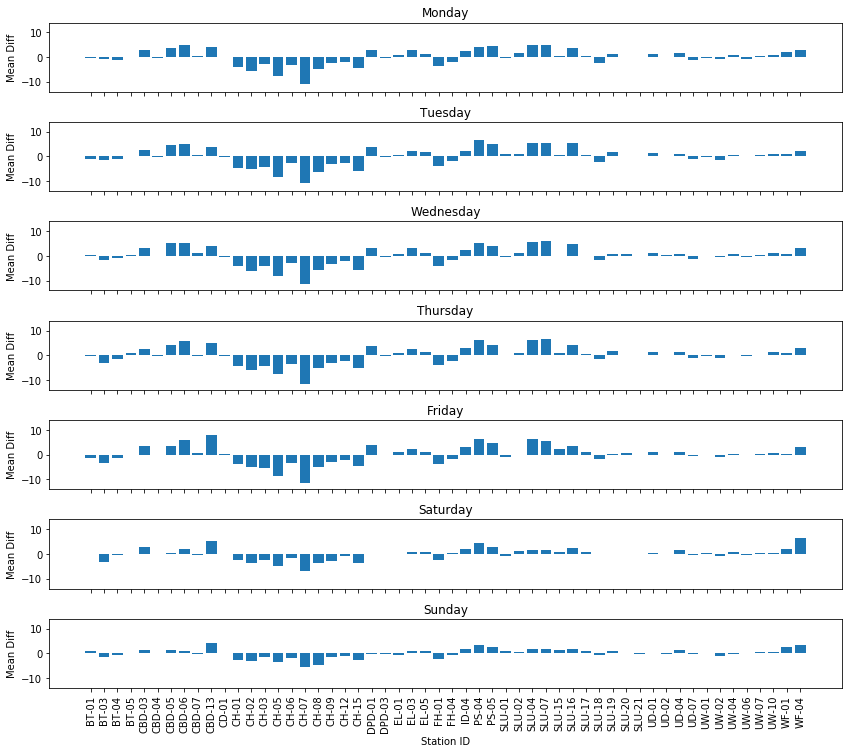

In [12]:
# create the plots
fig = plt.figure(figsize=(12, 10))  # Controls global properties of the bar plot
opts = {'xlabel': 'Station ID', 'ylabel': 'Mean Diff','ylim':[-14,14]}
plotStatsByDay(netBikes, 'Net', opts)